## Business case : The target is will the client subscribed a term deposit?(Yes/No)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('bank-additional-full.csv',sep=';',quotechar='"')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [13]:
print(df['y'].value_counts())

y
no     36548
yes     4640
Name: count, dtype: int64


In [ ]:
# EDA sweetviz - univariate & autoviz - bivaraite analysis

In [15]:
import sweetviz as sv
report = sv.analyze(df)
print(report.show_html())

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
None


In [17]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [19]:
filename = 'bank-additional-full.csv'
sep=';'
dft = AV.AutoViz(
    filename,
    sep=";",
    depVar='',
    dfte=None,
    header=0,
    verbose=1,
    lowess=False,
    chart_format='svg',
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

Shape of your Data Set loaded: (41188, 21)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  5
    Number of String-Categorical Columns =  9
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    21 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
There are 12 d

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
age,int64,0.000000,0,17.000000,98.000000,Column has 468 outliers greater than upper bound (69.50) or lower than lower bound(9.50). Cap them or remove them.
job,object,0.000000,0,,,1 rare categories: ['unknown']. Group them into a single category or drop the categories.
marital,object,0.000000,0,,,1 rare categories: ['unknown']. Group them into a single category or drop the categories.
education,object,0.000000,0,,,1 rare categories: ['illiterate']. Group them into a single category or drop the categories.
default,object,0.000000,0,,,1 rare categories: ['yes']. Group them into a single category or drop the categories.
housing,object,0.000000,0,,,No issue
loan,object,0.000000,0,,,No issue
contact,object,0.000000,0,,,No issue
month,object,0.000000,0,,,1 rare categories: ['dec']. Group them into a single category or drop the categories.
day_of_week,object,0.000000,0,,,No issue


Number of All Scatter Plots = 15
All Plots done
Time to run AutoViz = 27 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
# Since there are duplicate values remove them because Duplicates can bias your model

In [15]:
df = df.drop_duplicates()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [19]:
dup = df.duplicated().sum()

In [21]:
dup

0

In [23]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Outlier
The proportion of positive target class ('yes') dropped significantly, from **11.3% to 5.4%.**

This means many 'yes' customers were treated as outliers and removed, which is not ideal.
**So here we are not removing the outliers**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.boxplot(x='age',data=df)

In [ ]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3-Q1
print("IQR = ",IQR)

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print("Lower Bound =",lower_bound)
print("Upper Bound =",upper_bound)

In [ ]:
outlier = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
df.drop(outlier.index,inplace=True)

In [ ]:
sns.boxplot(x='age',data=df)

In [ ]:
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3-Q1
print("IQR = ",IQR)

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print("Lower Bound =",lower_bound)
print("Upper Bound =",upper_bound)

In [ ]:
outlier = df[(df['duration'] < lower_bound) | (df['duration'] > upper_bound)]
df.drop(outlier.index,inplace=True)

In [ ]:
Q1 = df['campaign'].quantile(0.25)
Q3 = df['campaign'].quantile(0.75)
IQR = Q3-Q1
print("IQR = ",IQR)

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print("Lower Bound =",lower_bound)
print("Upper Bound =",upper_bound)

In [ ]:
outlier = df[(df['campaign'] < lower_bound) | (df['campaign'] > upper_bound)]
df.drop(outlier.index,inplace=True)

In [ ]:
Q1 = df['pdays'].quantile(0.25)
Q3 = df['pdays'].quantile(0.75)
IQR = Q3-Q1
print("IQR = ",IQR)

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print("Lower Bound =",lower_bound)
print("Upper Bound =",upper_bound)

In [ ]:
outlier = df[(df['pdays'] < lower_bound) | (df['pdays'] > upper_bound)]
df.drop(outlier.index,inplace=True)

In [ ]:
Q1 = df['previous'].quantile(0.25)
Q3 = df['previous'].quantile(0.75)
IQR = Q3-Q1
print("IQR = ",IQR)

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print("Lower Bound =",lower_bound)
print("Upper Bound =",upper_bound)

In [ ]:
outlier = df[(df['previous'] < lower_bound) | (df['previous'] > upper_bound)]
df.drop(outlier.index,inplace=True)

In [ ]:
Q1 = df['cons.conf.idx'].quantile(0.25)
Q3 = df['cons.conf.idx'].quantile(0.75)
IQR = Q3-Q1
print("IQR = ",IQR)

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print("Lower Bound =",lower_bound)
print("Upper Bound =",upper_bound)

In [ ]:
outlier = df[(df['cons.conf.idx'] < lower_bound) | (df['cons.conf.idx'] > upper_bound)]
df.drop(outlier.index,inplace=True)

In [ ]:
sns.boxplot(x='cons.conf.idx',data=df)

In [ ]:
df.info()

In [ ]:
print(df['y'].value_counts())

#### Outliers causing problem : reducing the target yes values drastically so i think keep outliers because yes is a minority class (imbalanced)

## Feature Engineering

In [25]:
df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


In [27]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [29]:
df = df[df['job'] != 'unknown']

In [31]:
# removed 'unknown' category

In [33]:
df1 = pd.get_dummies(df['job'],prefix='job',dtype=int,drop_first= True)
df = pd.concat([df,df1],axis=1).drop(['job'],axis=1)

In [35]:
df.head()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,56,married,basic.4y,no,no,no,telephone,may,mon,261,...,0,0,1,0,0,0,0,0,0,0
1,57,married,high.school,unknown,no,no,telephone,may,mon,149,...,0,0,0,0,0,0,1,0,0,0
2,37,married,high.school,no,yes,no,telephone,may,mon,226,...,0,0,0,0,0,0,1,0,0,0
3,40,married,basic.6y,no,no,no,telephone,may,mon,151,...,0,0,0,0,0,0,0,0,0,0
4,56,married,high.school,no,no,yes,telephone,may,mon,307,...,0,0,0,0,0,0,1,0,0,0


In [37]:
df = df[df['marital'] != 'unknown']

In [39]:
df = df[df['education'] != 'illiterate']

In [41]:
df1 = pd.get_dummies(df['education'],prefix='education',dtype=int,drop_first= True)
df = pd.concat([df,df1],axis=1).drop(['education'],axis=1)

In [43]:
df['marital'] = df['marital'].map({'married':0,'single':1,'divorced':2})

In [45]:
df = df[df['default'] != 'yes']

In [47]:
df = df[df['month'] != 'dec']

In [49]:
df.replace({'yes':1,'no':0,'unknown':2},inplace=True)

In [51]:
df['contact'] = df['contact'].map({'cellular':0,'telephone':1})

In [53]:
df['poutcome'].value_counts()

poutcome
nonexistent    35089
failure         4181
success         1304
Name: count, dtype: int64

In [55]:
df['poutcome'] = df['poutcome'].map({'nonexistent':0,'failure':1,'success':2})

In [57]:
df['day_of_week'] = df['day_of_week'].map({'mon':1,'tue':2,'wed':3,'thu':4,'fri':5})

In [59]:
month_mapping = {
    'mar': 1, 'apr': 2,'may': 3, 'jun': 4,'jul': 5,
    'aug': 6,'sep': 7, 'oct': 8, 'nov': 9
}
df['month'] = df['month'].map(month_mapping)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40574 entries, 0 to 41187
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            40574 non-null  int64  
 1   marital                        40574 non-null  int64  
 2   default                        40574 non-null  int64  
 3   housing                        40574 non-null  int64  
 4   loan                           40574 non-null  int64  
 5   contact                        40574 non-null  int64  
 6   month                          40574 non-null  int64  
 7   day_of_week                    40574 non-null  int64  
 8   duration                       40574 non-null  int64  
 9   campaign                       40574 non-null  int64  
 10  pdays                          40574 non-null  int64  
 11  previous                       40574 non-null  int64  
 12  poutcome                       40574 non-null  int6

In [64]:
print(df['y'].value_counts())

y
0    36073
1     4501
Name: count, dtype: int64


In [ ]:
# split data into X and Y

In [67]:
X = df.drop(columns='y',axis=1)

In [69]:
y = df['y']

### Scaling

In [71]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [73]:
x_scaled

array([[ 1.55127459, -0.73606077, -0.51184228, ..., -0.38332203,
        -0.64888853, -0.20142598],
       [ 1.64788088, -0.73606077,  1.95372684, ..., -0.38332203,
        -0.64888853, -0.20142598],
       [-0.28424498, -0.73606077, -0.51184228, ..., -0.38332203,
        -0.64888853, -0.20142598],
       ...,
       [ 1.55127459, -0.73606077, -0.51184228, ..., -0.38332203,
         1.54109675, -0.20142598],
       [ 0.39199907, -0.73606077, -0.51184228, ...,  2.6087726 ,
        -0.64888853, -0.20142598],
       [ 3.29018787, -0.73606077, -0.51184228, ...,  2.6087726 ,
        -0.64888853, -0.20142598]])

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

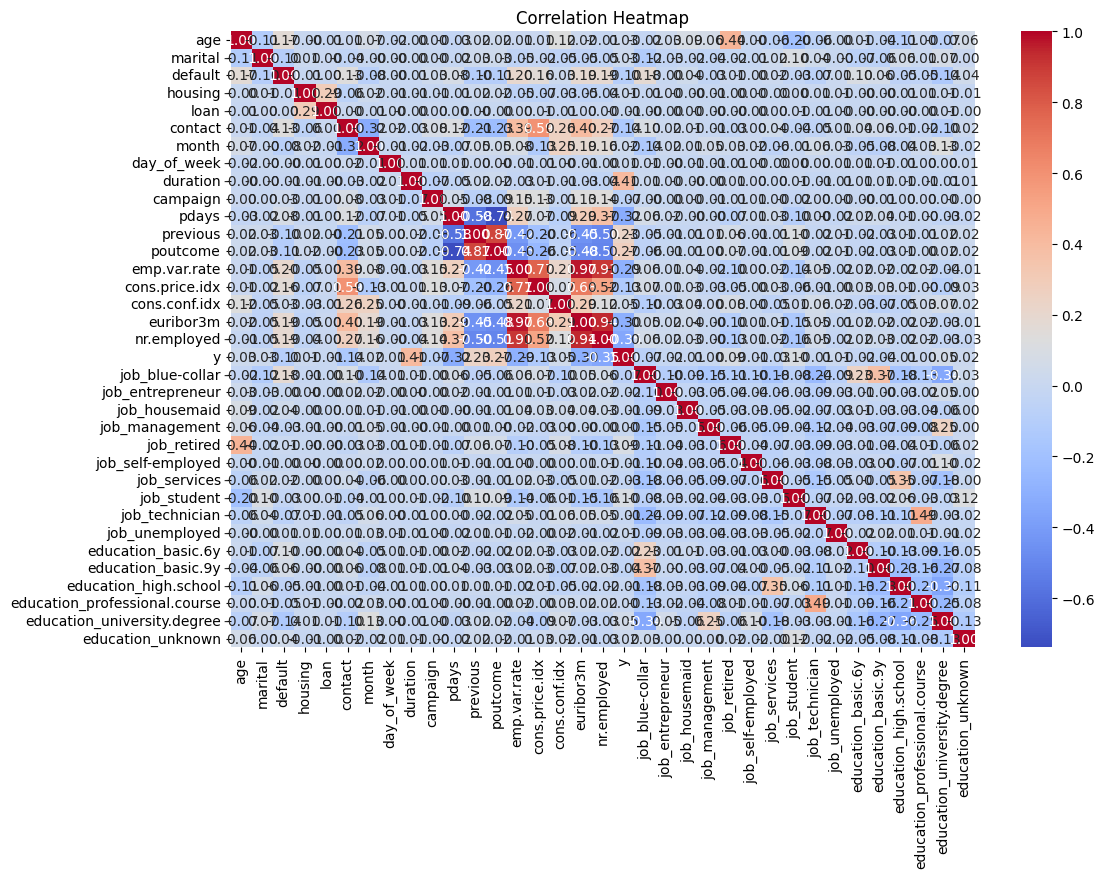

In [132]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [77]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,random_state=42)

In [79]:
X_train.shape

(30430, 34)

In [81]:
X_test.shape

(10144, 34)

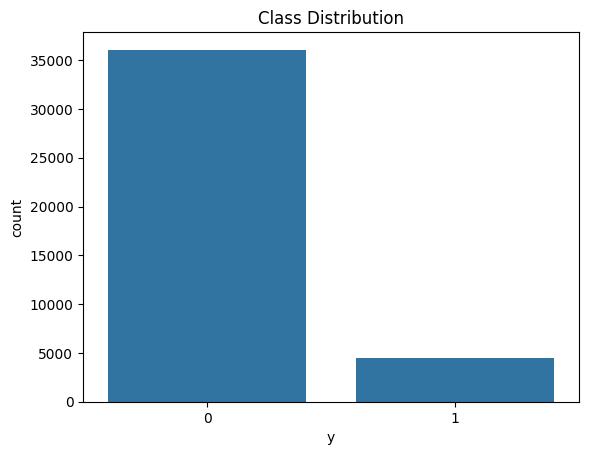

In [83]:
sns.countplot(x='y',data=df)  
plt.title("Class Distribution")
plt.show()

In [85]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [87]:
y_pred = lr.predict(X_test)

In [89]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [91]:
print('Accuracy score:',accuracy_score(y_test,y_pred))

Accuracy score: 0.9122634069400631


In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      9052
           1       0.67      0.37      0.48      1092

    accuracy                           0.91     10144
   macro avg       0.80      0.67      0.71     10144
weighted avg       0.90      0.91      0.90     10144



In [95]:
df['y'].value_counts()

y
0    36073
1     4501
Name: count, dtype: int64

In [97]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [99]:
from collections import Counter
print("Actual values:",Counter(y_train))
print("Balanced values:",Counter(y_train_smote))

Actual values: Counter({0: 27021, 1: 3409})
Balanced values: Counter({0: 27021, 1: 27021})


In [101]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost":XGBClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

In [103]:
# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_smote,y_train_smote)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))


Training Logistic Regression...
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      9052
           1       0.43      0.86      0.58      1092

    accuracy                           0.86     10144
   macro avg       0.71      0.86      0.75     10144
weighted avg       0.92      0.86      0.88     10144


Training Decision Tree...
Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      9052
           1       0.49      0.58      0.53      1092

    accuracy                           0.89     10144
   macro avg       0.72      0.75      0.73     10144
weighted avg       0.90      0.89      0.89     10144


Training Random Forest...
Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      9052
           1       0.59      0.64      0.61      1092

    accuracy                           0.91     10

In [ ]:
# Hyperparameter Tuning

In [111]:
# tuning xgboost
params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid = GridSearchCV(estimator=models["XGBoost"], param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_smote, y_train_smote)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best Accuracy: 0.9279639694941277


In [128]:
xg_mod= XGBClassifier(colsample_bytree= 0.8, learning_rate= 0.01, max_depth= 7, n_estimators= 200, subsample= 0.8)

In [130]:
xg_mod.fit(X_train_smote,y_train_smote)
y_pred = xg_mod.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


### 
**92%: Cross-validation score on X_train_smote (training phase)**

**89%: Accuracy on X_test (evaluation phase)** - performance on unseen data

This is normal and acceptable unless the drop is large (like >10%).

### Conclusion:
Portugese Bank dataset is a supervised ML classification task where the target variable is will the client subscribed a term deposit?(Yes/No)
No null values,Outliers were there but not removed because removing them causes the proportion of positive target class ('yes') dropped significantly, from **11.3% to 5.4%.** so here outliers are important also applied encoding (categorical--> numeric),applied scaling and handled imbalanced dataset. Algorithms used were Logistic Regression,SVM,KNN,Decision tree,gradient boosting,Random forest,XGBoost. Among them XGBoost gave the highest accuracy of 92%. Applied Tuning on **XGBoost gave training accuracy of 92% and 89% accuracy on test data(unseen data)**. 